In [1]:
import pandas as pd
import numpy as np
data_frame=pd.read_csv("Malaria_Dataset.csv")
print(data_frame.head()) #print first 5 rows of the dataset

   Temperature  Blood Pressure  Weight  Level of Malaria
0         28.7              72     7.1                 1
1         36.0              80    37.0                 1
2         35.6             120    85.0                 1
3         36.2             160     9.0                 1
4         37.0             120     9.0                 2


In [2]:
membership_function = [[['gaussmf',{'mean':np.mean(np.arange(23,46)), 'sigma':np.std(np.arange(23,46))}]
       ,['gaussmf',{'mean':np.mean(np.arange(32,58)), 'sigma':np.std(np.arange(32,58))}]
       ,['gaussmf',{'mean':np.mean(np.arange(47,69)), 'sigma':np.std(np.arange(47,69))}]]
       
       ,[['gaussmf',{'mean':np.mean(np.arange(23,46)), 'sigma':np.std(np.arange(23,46))}]
       ,['gaussmf',{'mean':np.mean(np.arange(32,58)), 'sigma':np.std(np.arange(32,58))}]
       ,['gaussmf',{'mean':np.mean(np.arange(47,69)), 'sigma':np.std(np.arange(47,69))}]]
       
       ,[['gaussmf',{'mean':np.mean(np.arange(23,46)), 'sigma':np.std(np.arange(23,46))}]
       ,['gaussmf',{'mean':np.mean(np.arange(32,58)), 'sigma':np.std(np.arange(32,58))}]
       ,['gaussmf',{'mean':np.mean(np.arange(47,69)), 'sigma':np.std(np.arange(47,69))}]]]

In [3]:
from membership import membershipfunction
import anfis
mfc = membershipfunction.MemFuncs(membership_function)
malaria_stages=data_frame.pop('Level of Malaria')
anf = anfis.ANFIS(data_frame,malaria_stages, mfc)

In [4]:
train=anf.trainHybridJangOffLine(epochs=10) #Train dataset for certain number of epochs

current error:  1.6675187592007477
current error:  1.6676934166073534
current error:  1.6678682702615133
current error:  1.668043325012085
current error:  1.6682185831323209
current error:  1.668394047265227
current error:  1.6685697224012868
current error:  1.6687456111542627
current error:  1.6689217177603566


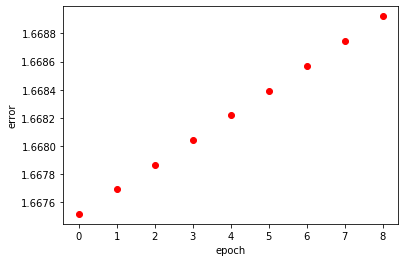

In [6]:
anf.plotErrors() #plot error to the number of epochs 

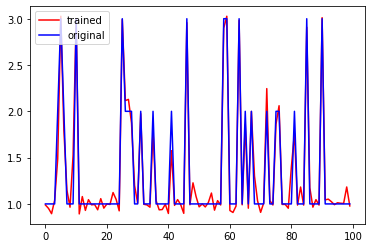

In [7]:
anf.plotResults() #plot result for original vs trained dataset

In [ ]:
data_frame['Level of Malaria']=malaria_stages
data_frame['ANFIS Results']=train
print(data_frame.head()) #shows the results calculated by the ANFIS model

In [ ]:
temp=float(input("Enter Body Temperature(in degree Celsius): "))
bp=float(input("Enter Blood Pressure(in mmHg): "))
w=float(input("Enter Weight(in KG): "))
x=np.asarray([[temp,bp,w]])
pr=anfis.predict(anf,x) #pridict the values entered by the user

In [ ]:
if(pr>=float(3)):
    print("Malaria Level Prediction: 3")
elif(pr<=float(1)):
    print("Malaria Level Prediction: 1")
else:
    print("Malaria Level Prediction: ",round((float(pr))))
print("\nWhere:\nLevel-1 = Malaria Free - Discharge Without Medicine\nLevel-2 = Uncomplicated Malaria – Artesunate Amordaiquine(tab or syrup)\nLevel-3 = Complicated Malaria – IM Quinine OR Quinine Tablet")